## importing libs

In [24]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
xx_noise = pd.read_csv('pro_data_with_noise.csv')
xx_no_noise = pd.read_csv('pro_data_no_noise.csv')

## Removing null values

In [15]:
# Replacing null values with mean
for i in xx_noise.columns[:-1]:
    xx_noise[i].fillna(
        value = pd.to_numeric(
                                xx_noise[i]
                             ).mean()
        ,inplace=True
    )

In [16]:
# Replacing null values with mean
for i in xx_no_noise.columns[:-1]:
    xx_no_noise[i].fillna(
        value = pd.to_numeric(
                                xx_no_noise[i]
                             ).mean()
        ,inplace=True
    )

In [17]:
# x: predictor variables
# y: predicted variable

x_n = xx_noise.iloc[:,:13]
y_n = xx_noise.iloc[:,-1:]

In [18]:
# Label Encoding

y_n=y_n.replace('N',0)
y_n=y_n.replace('A',1)

In [19]:
# x: predictor variables
# y: predicted variable

x = xx_no_noise.iloc[:,:13]
y = xx_no_noise.iloc[:,-1:]

In [20]:
# Label Encoding

y=y.replace('N',0)
y=y.replace('A',1)

# Model with no noise data

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

ANOVA based feature selection process

In [33]:

# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(x_train, y_train)
# transform train input data
X_train_fs = fs.transform(x_train)
# transform test input data
X_test_fs = fs.transform(x_test)

C:\Users\ashwi\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [42]:
fields = xx_no_noise.columns

Feature bpm: 4.334759
Feature ibi: 23.438850
Feature sdnn: 42.221171
Feature sdsd: 0.689460
Feature rmssd: 20.921415
Feature pnn20: 133.139692
Feature pnn50: 99.131266
Feature hr_mad: 17.881803
Feature sd1: 21.515655
Feature sd2: 125.184455
Feature s: 34.000893
Feature sd1/sd2: 2.853913
Feature breathingrate: 9.253781


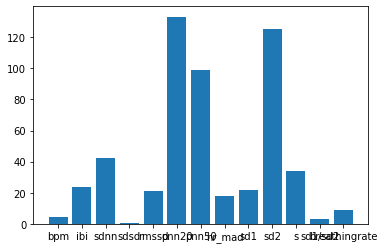

In [44]:

# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %s: %f' % (fields[i], fs.scores_[i]))
# plot the scores
plt.bar([fields[i] for i in range(len(fs.scores_))], fs.scores_)
plt.show()

Model training

In [60]:
# Without ANOVA features

model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)
# evaluate the model
yhat = model.predict(x_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))
y3_pred=model.predict(x_test)
print('MSE:',np.sqrt(mean_squared_error(y_test,y3_pred)))

Accuracy: 88.24
MSE: 0.3429971702850177


C:\Users\ashwi\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [61]:
# With ANOVA features

model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))
y3_pred=model.predict(X_test_fs)
print('MSE:',np.sqrt(mean_squared_error(y_test,y3_pred)))

Accuracy: 88.24
MSE: 0.3429971702850177


C:\Users\ashwi\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [47]:
# With ANOVA features

model = RandomForestRegressor()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
y3_pred=model.predict(X_test_fs)
print('MSE:',np.sqrt(mean_squared_error(y_test,y3_pred)))
print('Accuracy: %.2f' % (model.score(X_test_fs,y_test)*100))

<ipython-input-47-79c4b81de812>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_fs, y_train)


MSE: 0.2351088761493053
Accuracy: 42.44


In [48]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train_fs,y_train)
print('model score:',xg_reg.score(X_test_fs,y_test)*100)
y3_pred=xg_reg.predict(X_test_fs)
print('MSE:',np.sqrt(mean_squared_error(y_test,y3_pred)))

model score: 34.95272969347839
MSE: 0.2499237818806562


# Model with noise data

In [49]:
x_trainn,x_testn,y_trainn,y_testn=train_test_split(x_n,y_n,test_size=0.2)

ANOVA based feature selection process

In [50]:

# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(x_trainn, y_trainn)
# transform train input data
X_train_fsn = fs.transform(x_trainn)
# transform test input data
X_test_fsn = fs.transform(x_testn)

C:\Users\ashwi\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [51]:
fields = xx_no_noise.columns

Feature bpm: 4.679916
Feature ibi: 19.876747
Feature sdnn: 41.157952
Feature sdsd: 155.005902
Feature rmssd: 20.318324
Feature pnn20: 132.806615
Feature pnn50: 99.026447
Feature hr_mad: 13.785418
Feature sd1: 24.635081
Feature sd2: 120.446535
Feature s: 34.473955
Feature sd1/sd2: 3.539097
Feature breathingrate: 8.451687


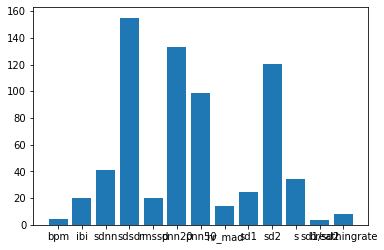

In [52]:

# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %s: %f' % (fields[i], fs.scores_[i]))
# plot the scores
plt.bar([fields[i] for i in range(len(fs.scores_))], fs.scores_)
plt.show()

Model training

In [79]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_trainn, y_trainn)
# evaluate the model
yhat = knn.predict(x_testn)
# evaluate predictions
accuracy = accuracy_score(y_testn, yhat)
print('Accuracy: %.2f' % (accuracy*100))
y3_predn=knn.predict(x_testn)
print('MSE:',np.sqrt(mean_squared_error(y_testn,y3_predn)))

Accuracy: 88.29
MSE: 0.34226138716316973


<ipython-input-79-89e337c4516d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_trainn, y_trainn)


In [62]:
# Without ANOVA features

model = LogisticRegression(solver='liblinear')
model.fit(x_trainn, y_trainn)
# evaluate the model
yhat = model.predict(x_testn)
# evaluate predictions
accuracy = accuracy_score(y_testn, yhat)
print('Accuracy: %.2f' % (accuracy*100))
y3_predn=model.predict(x_testn)
print('MSE:',np.sqrt(mean_squared_error(y_testn,y3_predn)))

Accuracy: 88.29
MSE: 0.34226138716316973


C:\Users\ashwi\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [63]:
# With ANOVA features

model = LogisticRegression(solver='liblinear')
model.fit(X_train_fsn, y_trainn)
# evaluate the model
yhat = model.predict(X_test_fsn)
# evaluate predictions
accuracy = accuracy_score(y_testn, yhat)
print('Accuracy: %.2f' % (accuracy*100))
y3_predn=model.predict(X_test_fsn)
print('MSE:',np.sqrt(mean_squared_error(y_testn,y3_predn)))

Accuracy: 88.29
MSE: 0.34226138716316973


C:\Users\ashwi\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [58]:
# With ANOVA features

model = RandomForestRegressor()
model.fit(X_train_fsn, y_trainn)
# evaluate the model
yhat = model.predict(X_test_fsn)
# evaluate predictions
y3_pred=model.predict(X_test_fsn)
print('MSE:',np.sqrt(mean_squared_error(y_testn,y3_predn)))
print('Accuracy: %.2f' % (model.score(X_test_fsn,y_testn)*100))

<ipython-input-58-da525140ac58>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_fsn, y_trainn)


MSE: 0.34226138716316973
Accuracy: 42.01


In [59]:
xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train_fsn,y_trainn)
print('model score:',xg_reg.score(X_test_fsn,y_testn)*100)
y3_predn=xg_reg.predict(X_test_fsn)
print('MSE:',np.sqrt(mean_squared_error(y_testn,y3_predn)))

model score: 35.58700168993588
MSE: 0.2525406019492291


## Building model with full data including noise

In [64]:

# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(x_n, y_n)
# transform train input data
X_train_fs = fs.transform(x_n)

C:\Users\ashwi\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [65]:
# With ANOVA features

model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_n)

C:\Users\ashwi\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(solver='liblinear')

## Saving model

In [74]:
import pickle

In [76]:
pickle.dump('model',open('model.pkl','wb'))